Load Preprocessed Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load cleaned dataset
fraud_df = pd.read_csv("../data/fraud_data_ready.csv")
print("✅ Loaded preprocessed fraud dataset.")


✅ Loaded preprocessed fraud dataset.


Split Features & Target

In [2]:
# Separate target and features
X = fraud_df.drop(columns=['class'])
y = fraud_df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"✅ Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Fraud ratio in train: {y_train.mean():.4f}, in test: {y_test.mean():.4f}")


✅ Train shape: (120889, 203), Test shape: (30223, 203)
Fraud ratio in train: 0.0936, in test: 0.0936


In [5]:
from imblearn.over_sampling import SMOTE

# Drop non-numeric columns before SMOTE
non_numeric_cols = ['signup_time', 'purchase_time', 'device_id', 'ip_address']
X_train_smote = X_train.drop(columns=non_numeric_cols)

# Apply SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_smote, y_train)

# Show results
print("✅ SMOTE applied.")
print(f"Original training set: {y_train.value_counts().to_dict()}")
print(f"Balanced training set: {y_train_balanced.value_counts().to_dict()}")


✅ SMOTE applied.
Original training set: {0: 109568, 1: 11321}
Balanced training set: {0: 109568, 1: 109568}


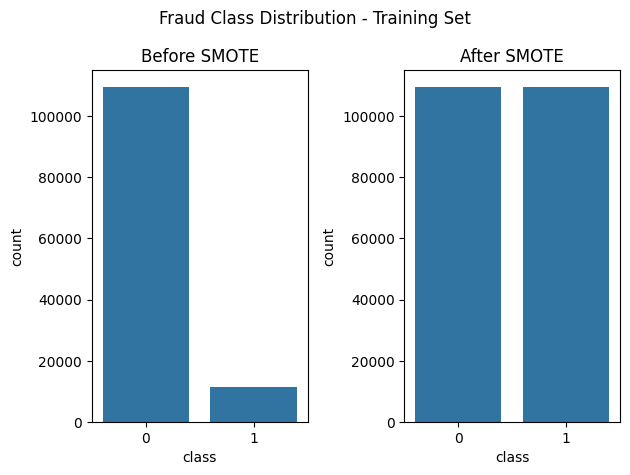

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Before SMOTE")

# After
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_balanced)
plt.title("After SMOTE")

plt.suptitle("Fraud Class Distribution - Training Set")
plt.tight_layout()
plt.show()


Train Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from src.model_utils import evaluate_model

# Train logistic regression on SMOTE-balanced data
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_balanced, y_train_balanced)

# Evaluate on original test set
evaluate_model(lr_model, X_test, y_test, model_name="Logistic Regression")


ModuleNotFoundError: No module named 'src'